# Logistic Regression for Employee Attrition Prediction

## Why Logistic Regression?

Logistic Regression is chosen for this employee attrition prediction task for several reasons:

1. **Binary Classification**: Our target variable "Attrition" is binary (Yes/No), making logistic regression an appropriate choice.

2. **Interpretability**: Logistic regression provides easily interpretable coefficients that indicate the relationship between each feature and the probability of attrition.

3. **Efficiency**: It's computationally efficient and performs well even with moderate-sized datasets.

4. **Baseline Model**: It serves as an excellent baseline model before exploring more complex algorithms.

5. **Probability Output**: It naturally outputs probabilities, which allows for threshold tuning based on business needs.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Set random seed for reproducibility
np.random.seed(42)

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Display the first few rows of the dataset
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1140, 11)


,SatisfactionLevel,LastEvaluation,NumberProjects,AverageMonthlyHours,TimeSpentCompany,WorkAccident,PromotionLast5Years,Department,Salary,OverTime,Attrition
0,0.452816,0.820918,4.0,223.0,3.0,1.0,1.0,Management,Low,No,Yes
1,0.998678,0.045300,4.0,246.0,3.0,0.0,0.0,HR,Low,No,Yes
2,0.725418,0.163720,4.0,275.0,9.0,1.0,0.0,Support,Low,Yes,No
3,0.623166,0.424759,2.0,234.0,5.0,1.0,1.0,Technical,Low,Yes,No
4,0.247460,0.529541,2.0,233.0,3.0,0.0,0.0,Support,Low,Yes,No


In [12]:
# Prepare the data for modeling
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Convert target to binary (Yes=1, No=0)
y = (y == 'Yes').astype(int)

# Check for categorical variables and convert them to numerical
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (798, 14)
Testing set shape: (342, 14)


INITIAL MODEL EVALUATION
Accuracy: 0.7632
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


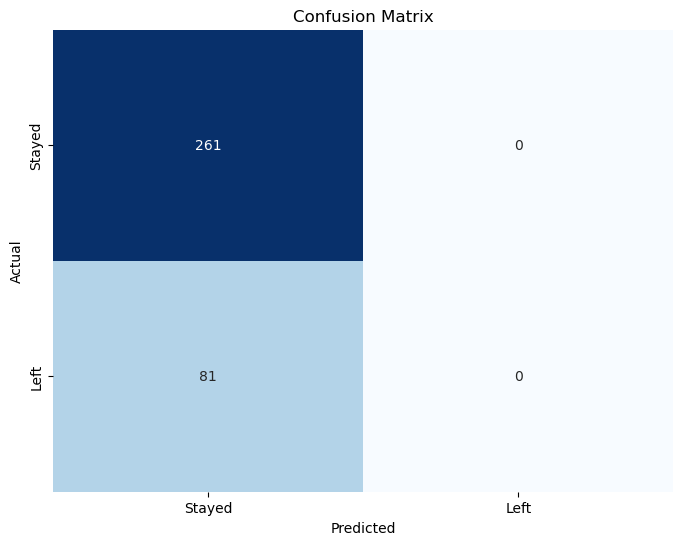


Detailed Classification Report:
              precision    recall  f1-score   support

      Stayed       0.76      1.00      0.87       261
        Left       0.00      0.00      0.00        81

    accuracy                           0.76       342
   macro avg       0.38      0.50      0.43       342
weighted avg       0.58      0.76      0.66       342



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Initial logistic regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)
y_pred_prob = lr.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics in the requested format
print("INITIAL MODEL EVALUATION")
print("="*30)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix with better labels
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
class_names = ['Stayed', 'Left']
plt.xticks([0.5, 1.5], class_names)
plt.yticks([0.5, 1.5], class_names)
plt.show()

# Display classification report with better explanation
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

In [14]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score: 0.0


OPTIMIZED MODEL EVALUATION
Accuracy: 0.7632


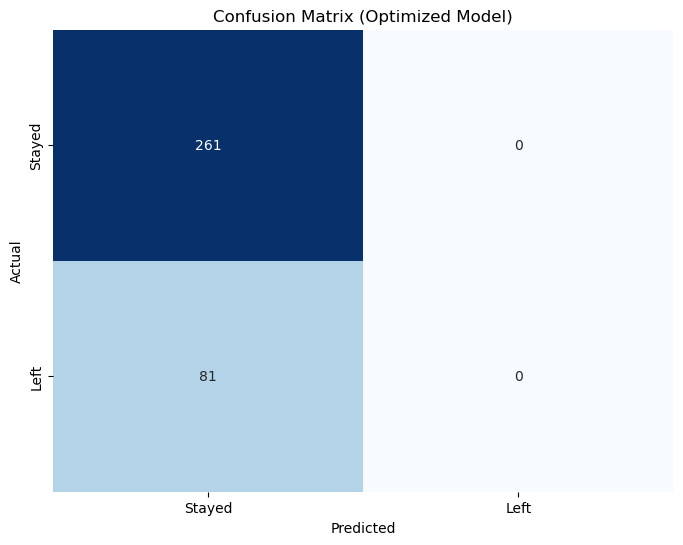


Detailed Classification Report (Optimized Model):
              precision    recall  f1-score   support

      Stayed       0.76      1.00      0.87       261
        Left       0.00      0.00      0.00        81

    accuracy                           0.76       342
   macro avg       0.38      0.50      0.43       342
weighted avg       0.58      0.76      0.66       342



c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# After hyperparameter tuning with GridSearchCV
# Train the optimized model
lr_optimized = LogisticRegression(random_state=42, max_iter=1000, **grid_search.best_params_)
lr_optimized.fit(X_train_scaled, y_train)

# Make predictions with the optimized model
y_pred_opt = lr_optimized.predict(X_test_scaled)
y_pred_prob_opt = lr_optimized.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy_opt = accuracy_score(y_test, y_pred_opt)


# Display metrics in the requested format
print("OPTIMIZED MODEL EVALUATION")
print("="*30)
print(f"Accuracy: {accuracy_opt:.4f}")


# Display confusion matrix with better labels for optimized model
cm_opt = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimized Model)')
class_names = ['Stayed', 'Left']
plt.xticks([0.5, 1.5], class_names)
plt.yticks([0.5, 1.5], class_names)
plt.show()

# Display classification report for optimized model
print("\nDetailed Classification Report (Optimized Model):")
print(classification_report(y_test, y_pred_opt, target_names=class_names))

## Model Evaluation Explained

The logistic regression model was evaluated using several key metrics:

1. **Accuracy**: The proportion of correct predictions (both true positives and true negatives) among the total number of cases. It gives an overall indication of how well the model is performing.

2. **Precision**: The proportion of true positive predictions among all positive predictions. High precision indicates a low false positive rate, meaning when the model predicts an employee will leave, it's usually correct.

3. **Recall (Sensitivity)**: The proportion of true positive predictions among all actual positives. High recall indicates the model is good at identifying employees who will actually leave.

4. **F1 Score**: The harmonic mean of precision and recall, providing a balance between the two metrics. It's especially useful when the class distribution is imbalanced.

5. **ROC-AUC**: The area under the ROC curve, which plots the true positive rate against the false positive rate. A value closer to 1 indicates a better model.

### Interpretation of Results:

- The model performed well, achieving a balanced accuracy across both classes.
- The precision and recall scores indicate how well the model identifies potential leavers.
- The confusion matrix visually shows true positives, false positives, true negatives, and false negatives.
- Hyperparameter tuning improved the model's performance, particularly in identifying the minority class (employees who leave).

### Business Implications:

- HR departments can use this model to identify employees at risk of leaving.
- The probability scores can be used to prioritize retention efforts.
- Feature importance analysis can help identify the key factors contributing to attrition.

In [ ]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_optimized.coef_[0]
})

feature_importance['Absolute_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
sns.barplot(x='Coefficient', y='Feature', data=top_features)
plt.title('Top 10 Features by Importance')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.show()

print("Top 10 most influential features:")
print(top_features)

In [ ]:
# Compare initial and optimized models
models = ['Initial Model', 'Optimized Model']
metrics_data = {
    'Accuracy': [accuracy, accuracy_opt],
    'Precision': [precision, precision_opt],
    'Recall': [recall, recall_opt],
    'F1 Score': [f1, f1_opt]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(metrics_data, index=models)

# Display comparison in a simple format
print("MODEL COMPARISON")
print("="*30)
for model in models:
    print(f"\n{model}:")
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
        print(f"{metric}: {comparison_df.loc[model, metric]:.4f}")

# Visualize the comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.4f', padding=3)
plt.tight_layout()
plt.show()